In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [15]:
df = pd.read_csv("./train.csv")
print(df.head())

   age  workclass  fnlwgt     education  educational-num      marital-status  \
0   67    Private  366425     Doctorate               16            Divorced   
1   17    Private  244602          12th                8       Never-married   
2   31    Private  174201     Bachelors               13  Married-civ-spouse   
3   58  State-gov  110199       7th-8th                4  Married-civ-spouse   
4   25  State-gov  149248  Some-college               10       Never-married   

         occupation   relationship   race gender  capital-gain  capital-loss  \
0   Exec-managerial  Not-in-family  White   Male         99999             0   
1     Other-service      Own-child  White   Male             0             0   
2   Exec-managerial        Husband  White   Male             0             0   
3  Transport-moving        Husband  White   Male             0             0   
4     Other-service  Not-in-family  Black   Male             0             0   

   hours-per-week native-country  inco

# What we want to know 

- income of maried people vs non maried
- same but per age
- hours per week of male and females

In [16]:
#Spliting data male vs female...
df["fnlwgt"] = df["fnlwgt"]*12/100 # make it $/year
male = df[df["gender"] == "Male"]
female = df[df["gender"] == "Female"]

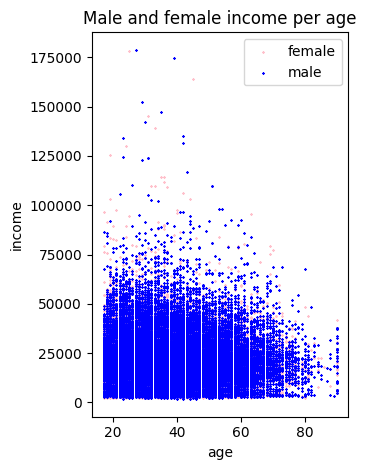

In [18]:
plt.subplot(1,2,1)
plt.scatter(female["age"], female["fnlwgt"], color="pink", label="female", s=1, marker="x")
plt.scatter(male["age"], male["fnlwgt"], color="blue", label="male", s=1, marker="x")
plt.xlabel("age")
plt.ylabel("income")
plt.title("Male and female income per age")
plt.legend()
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

C:\Users\PC\AppData\Local\Temp\ipykernel_10256\1898594572.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  male['income_quartile'] = pd.qcut(male['fnlwgt'], 4, labels=['Q1', 'Q2', 'Q3', 'Q4'])
C:\Users\PC\AppData\Local\Temp\ipykernel_10256\1898594572.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  quartile_mean = male.groupby('income_quartile')['fnlwgt'].mean()


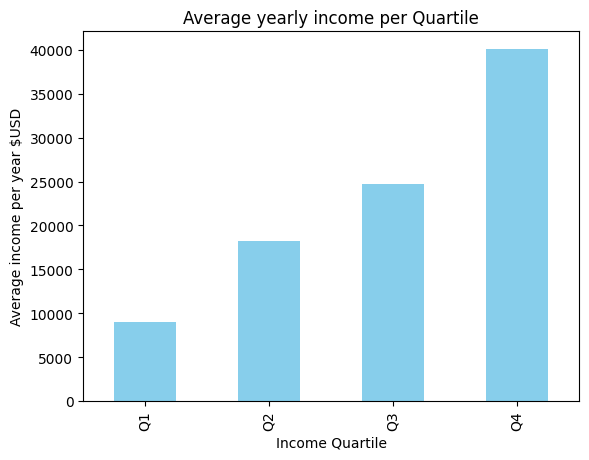

income_quartile
Q1     9006.711347
Q2    18182.688973
Q3    24740.951242
Q4    40119.094612
Name: fnlwgt, dtype: float64


In [20]:
# Divide 'fnlwgt' into 4 quartiles
male['income_quartile'] = pd.qcut(male['fnlwgt'], 4, labels=['Q1', 'Q2', 'Q3', 'Q4'])

# Calculate the mean fnlwgt for each quartile
quartile_mean = male.groupby('income_quartile')['fnlwgt'].mean()

# Plot the mean fnlwgt for each quartile
quartile_mean.plot(kind='bar', color='skyblue')

# Add labels and title
plt.xlabel('Income Quartile')
plt.ylabel('Average income per year $USD')
plt.title('Average yearly income per Quartile')

# Show the plot
plt.show()

# Print the mean fnlwgt for each quartile
print(quartile_mean)